Analytical Jacobian is: 

⎡sin(θ₁(t))⋅sin(θ₂(t))⋅sin(θ₃(t)) - sin(θ₁(t))⋅cos(θ₂(t))⋅cos(θ₃(t)) - sin(θ₁(
⎢                                                                             
⎢-sin(θ₂(t))⋅sin(θ₃(t))⋅cos(θ₁(t)) + cos(θ₁(t))⋅cos(θ₂(t))⋅cos(θ₃(t)) + cos(θ₁
⎢                                                                             
⎢                                             0                               
⎢                                                                             
⎢                                   cos(θ₁(t))⋅cos(θ₂(t))                     
⎢                                                                             
⎢                                   sin(θ₁(t))⋅cos(θ₂(t))                     
⎢                                                                             
⎣                                         sin(θ₂(t))                          

t))⋅cos(θ₂(t))   -sin(θ₂(t))⋅cos(θ₁(t))⋅cos(θ₃(t)) - sin(θ₂(t))⋅cos(θ₁(t)) - s
                         

(0.0, 2.0)

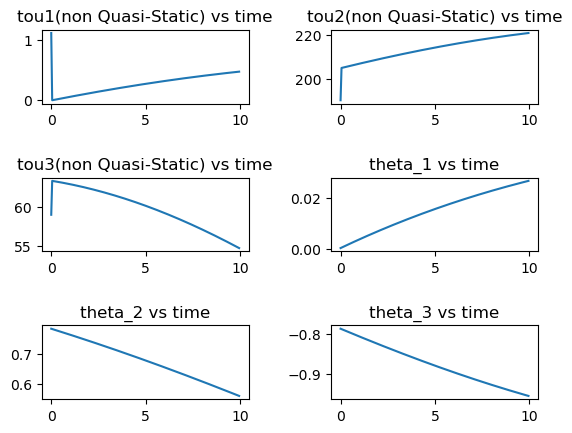

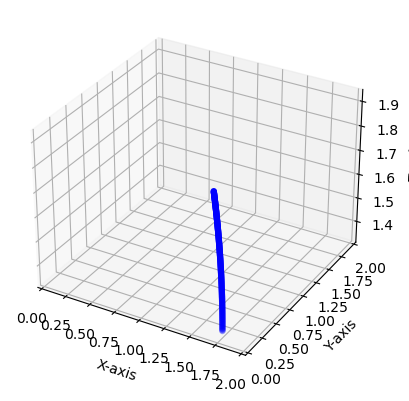

In [25]:
## Code for Final Exam Problem 1

from sympy import *
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d,Axes3D

theta_1 = symbols("theta_1")   
theta_2 = symbols("theta_2")   
theta_3 = symbols("theta_3")   
d1 = symbols("d1")
d2 = symbols("d2")
d3 = symbols("d3")
d4 = symbols("d4")
d5 = symbols("d5")
d6 = symbols("d6")
t=symbols("t")
theta_1 = Function('theta_1')(t)
theta_2 = Function('theta_2')(t)
theta_3 = Function('theta_3')(t)
qd1 = symbols("qd1")
qd2 = symbols("qd2")
qd3 = symbols("qd3")

## Moment of inertia tensor
It=Matrix([[1.09,0,0],[0,1.09,0],[0,0,0.03]])


## Defining transformation matrices
t01 = Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,d1],[0,0,0,1]])
t12 = Matrix([[cos(theta_1),0,sin(theta_1),0],[sin(theta_1),0,-cos(theta_1),0],[0,1,0,d2],[0,0,0,1]])
t2d1 = Matrix([[-sin(theta_2),0,cos(theta_2),0],[cos(theta_2),0,sin(theta_2),0],[0,1,0,d3],[0,0,0,1]])
td13 = Matrix([[1,0,0,0],[0,0,1,0],[0,-1,0,d4],[0,0,0,1]])
t3d2 = Matrix([[cos(theta_3),0,sin(theta_3),0],[sin(theta_3),0,-cos(theta_3),0],[0,1,0,d5],[0,0,0,1]])
td24 = Matrix([[1,0,0,0],[0,1,0,0],[0,0,1,d6],[0,0,0,1]])


## Obtaining Matrix T

T1=t01.subs(d1,0.2)*t12.subs(d2,1)*t2d1.subs(d3,0)
T2=t01.subs(d1,0.2)*t12.subs(d2,1)*t2d1.subs(d3,0)*td13.subs(d4,1)
T3=t01.subs(d1,0.2)*t12.subs(d2,1)*t2d1.subs(d3,0)*td13.subs(d4,1)*t3d2.subs(d5,0)*td24.subs(d6,1)


## Obtaining Column Matrices Z
Z1=expand(T1[0:3,2])
Z2=expand(T2[0:3,2])
Z3=expand(T3[0:3,2])


## Obtaining Row Matrix P
P=expand(T3[0:3,3])

## Obtaining partial derivate of P wrt different joint angles 
p1=expand(diff(P,theta_1))
p2=expand(diff(P,theta_2))
p3=expand(diff(P,theta_3))


## Obtaining Jacobian Matrix J
J1=Matrix.hstack(p1,p2,p3)
J2=Matrix.hstack(Z1,Z2,Z3)
J3=Matrix.vstack(J1,J2)
J=expand(J3)

## Printing the jacobian
print("Analytical Jacobian is:",'\n')
pprint(J)


## Computing the transformation matrices to the centre of mass of the links
R1=t01.subs([(d1,0.2)])*t12.subs([(d2,1/2)])
R2=t01.subs([(d1,0.2)])*t12.subs([(d2,1)])*t2d1.subs(d3,0)*td13.subs(d4,1/2)
R3=t01.subs([(d1,0.2)])*t12.subs([(d2,1)])*t2d1.subs(d3,0)*td13.subs(d4,1)*t3d2.subs(d5,0)*td24.subs(d6,1/2)

## Moment of inertia with respect to the base frame
I1=R1[0:3,0:3]*It*Transpose(R1[0:3,0:3])
I2=R2[0:3,0:3]*It*Transpose(R2[0:3,0:3])
I3=R3[0:3,0:3]*It*Transpose(R3[0:3,0:3])

pos1=R1[0:3,3]
pos2=R2[0:3,3]
pos3=R3[0:3,3]

## Linear velocity jacobian
Jv1=Matrix([[diff(R1[0:3,3],theta_1),diff(R1[0:3,3],theta_2),diff(R1[0:3,3],theta_3)]])
Jv2=Matrix([[diff(R2[0:3,3],theta_1),diff(R2[0:3,3],theta_2),diff(R2[0:3,3],theta_3)]])
Jv3=Matrix([[diff(R3[0:3,3],theta_1),diff(R3[0:3,3],theta_2),diff(R3[0:3,3],theta_3)]])

## Angular velocity jacobian
Z=Matrix([[0],[0],[0]])
Jw1=Matrix([[R1[0:3,2],Z,Z]])
Jw2=Matrix([[R1[0:3,2],R2[0:3,2],Z]])
Jw3=Matrix([[R1[0:3,2],R2[0:3,2],R3[0:3,2]]])

## Computing M matrix
M1=12.92*((Transpose(Jv1)*Jv1)+(Transpose(Jv2)*Jv2)+(Transpose(Jv3)*Jv3))
M2=(Transpose(Jw1)*I1*Jw1)+(Transpose(Jw2)*I2*Jw2)+(Transpose(Jw3)*I3*Jw3)
M=M1+M2

## Computing C matrix
C111=0.5*(diff(M[0,0],theta_1)+diff(M[0,0],theta_1)-diff(M[0,0],theta_1))*qd1
C112=0.5*(diff(M[1,0],theta_1)+diff(M[1,0],theta_1)-diff(M[0,0],theta_2))*qd1
C113=0.5*(diff(M[2,0],theta_1)+diff(M[2,0],theta_1)-diff(M[0,0],theta_3))*qd1
C121=0.5*(diff(M[0,1],theta_1)+diff(M[0,0],theta_2)-diff(M[0,1],theta_1))*qd1
C122=0.5*(diff(M[1,1],theta_1)+diff(M[1,0],theta_2)-diff(M[0,1],theta_2))*qd1
C123=0.5*(diff(M[2,1],theta_1)+diff(M[2,0],theta_2)-diff(M[0,1],theta_3))*qd1
C131=0.5*(diff(M[0,2],theta_1)+diff(M[0,0],theta_3)-diff(M[0,2],theta_1))*qd1
C132=0.5*(diff(M[1,2],theta_1)+diff(M[1,0],theta_3)-diff(M[0,2],theta_2))*qd1
C133=0.5*(diff(M[2,2],theta_1)+diff(M[2,0],theta_3)-diff(M[0,2],theta_3))*qd1

C211=0.5*(diff(M[0,0],theta_2)+diff(M[0,1],theta_1)-diff(M[1,0],theta_1))*qd2
C212=0.5*(diff(M[1,0],theta_2)+diff(M[1,1],theta_1)-diff(M[1,0],theta_2))*qd2
C213=0.5*(diff(M[2,0],theta_2)+diff(M[2,1],theta_1)-diff(M[1,0],theta_3))*qd2
C221=0.5*(diff(M[0,1],theta_2)+diff(M[0,1],theta_2)-diff(M[1,1],theta_1))*qd2
C222=0.5*(diff(M[1,1],theta_2)+diff(M[1,1],theta_2)-diff(M[1,1],theta_2))*qd2
C223=0.5*(diff(M[2,1],theta_2)+diff(M[2,1],theta_2)-diff(M[1,1],theta_3))*qd2
C231=0.5*(diff(M[0,2],theta_2)+diff(M[0,1],theta_2)-diff(M[1,2],theta_1))*qd2
C232=0.5*(diff(M[1,2],theta_2)+diff(M[1,1],theta_2)-diff(M[1,2],theta_2))*qd2
C233=0.5*(diff(M[2,2],theta_2)+diff(M[2,1],theta_2)-diff(M[1,2],theta_3))*qd2

C311=0.5*(diff(M[0,0],theta_3)+diff(M[0,2],theta_1)-diff(M[2,0],theta_1))*qd3
C312=0.5*(diff(M[1,0],theta_3)+diff(M[1,2],theta_1)-diff(M[2,0],theta_2))*qd3
C313=0.5*(diff(M[2,0],theta_3)+diff(M[2,2],theta_1)-diff(M[2,0],theta_3))*qd3
C321=0.5*(diff(M[0,1],theta_3)+diff(M[0,2],theta_2)-diff(M[2,1],theta_1))*qd3
C322=0.5*(diff(M[1,1],theta_3)+diff(M[1,2],theta_2)-diff(M[2,1],theta_2))*qd3
C323=0.5*(diff(M[2,1],theta_3)+diff(M[2,2],theta_2)-diff(M[2,1],theta_3))*qd3
C331=0.5*(diff(M[0,2],theta_3)+diff(M[0,2],theta_2)-diff(M[2,2],theta_1))*qd3
C332=0.5*(diff(M[1,2],theta_3)+diff(M[1,2],theta_2)-diff(M[2,2],theta_2))*qd3
C333=0.5*(diff(M[2,2],theta_3)+diff(M[2,2],theta_2)-diff(M[2,2],theta_3))*qd3


C11=C111+C211+C311
C12=C121+C221+C321
C13=C131+C231+C331
C21=C112+C212+C312
C22=C122+C222+C322
C23=C132+C232+C332
C31=C113+C213+C313
C32=C123+C223+C323
C33=C133+C233+C333

C=Matrix([[C11,C12,C13],[C21,C22,C23],[C31,C32,C33]])

## Computing the potential energies of the links

h1=R1[2,3]
h2=R2[2,3]
h3=R3[2,3]

PE1=12.92*9.81*h1
PE2=12.92*9.81*h2
PE3=12.92*9.81*h3

PE=PE1+PE2+PE3

## Computing the gravity matrix

G1=diff(PE,theta_1)
G2=diff(PE,theta_2)
G3=diff(PE,theta_3)

G = Matrix([[G1],[G2],[G3]])

## Initializing variables
the1=0
the2=math.pi/4
the3=-math.pi/4
t=0
dt=0.05
xxx=[]
yyy=[]
zzz=[]
torque1qs=[]
torque2qs=[]
torque3qs=[]
torque1nqs=[]
torque2nqs=[]
torque3nqs=[]
time=[]
q1_dot_i=0
q2_dot_i=0
q3_dot_i=0
q111=[]
q222=[]
q333=[]


while t<=10:
    
    # Substituting the angle values into the Jacobian
    
    JS = J.subs([(theta_1,the1),(theta_2,the2),(theta_3,the3)])
    
    # Computing velocity trajectory

    x_dot=0
    y_dot=0
    z_dot=-0.0707
    phi_dot=0
    theta_dot=0
    psi_dot=0
    X_dot = Matrix([[x_dot],[y_dot],[z_dot],[phi_dot],[theta_dot],[psi_dot]])
    
    # Computing Joint Velocities
    
    Q_dot = JS.pinv() * X_dot
    q1_dot=Q_dot[0,0]
    q2_dot=Q_dot[1,0]
    q3_dot=Q_dot[2,0]
    
    ## Numerical differentiation to find the acceleration component
    q1_ddot=(q1_dot-q1_dot_i)/dt
    q2_ddot=(q2_dot-q2_dot_i)/dt
    q3_ddot=(q3_dot-q3_dot_i)/dt

    q1_dot_i=q1_dot
    q2_dot_i=q2_dot
    q3_dot_i=q3_dot
    
    
    ## Computing Joint Angle  
    q1=the1+(q1_dot*dt)
    q2=the2+(q2_dot*dt)
    q3=the3+(q3_dot*dt)

    q_ddot=Matrix([[q1_ddot],[q2_ddot],[q3_ddot]])
    q_dot=Matrix([[q1_dot],[q2_dot],[q3_dot]])
    
    ## Computing joint torques

    MS=M.subs([(theta_1,the1),(theta_2,the2),(theta_3,the3)])
    
    CS=C.subs([(theta_1,the1),(theta_2,the2),(theta_3,the3),(qd1,q1_dot),(qd2,q2_dot),(qd3,q3_dot)])
    
    F = Matrix([[10],[0],[0],[0],[0],[0]])
    
    JT=Transpose(JS)
    
    GS=G.subs([(theta_1,the1),(theta_2,the2),(theta_3,the3)])
    
    
    ## Calculating Non-Quasistatic torque
    tou_nqs=(MS*q_ddot)+(CS*q_dot)+GS-(JT*F)
    
    
    ## Calculating Quasistatic torque for reference
    tou_qs=GS-(JT*F)
    
    ## Substituting the new joint angle values to Final transformation matrix
    
    TU=expand(T3).subs([(theta_1,the1),(theta_2,the2),(theta_3,the3)])

    ## Extracting Position values of the end effector wrt base
    
    xxx.append((TU[0,3]))
    yyy.append((TU[1,3]))
    zzz.append((TU[2,3]))
    q111.append(q1)
    q222.append(q2)
    q333.append(q3)
    
    ## Extracting Joint torque values
    
    torque1qs.append((tou_qs[0,0]))
    torque2qs.append((tou_qs[1,0]))
    torque3qs.append((tou_qs[2,0]))
    torque1nqs.append((tou_nqs[0,0]))
    torque2nqs.append((tou_nqs[1,0]))
    torque3nqs.append((tou_nqs[2,0]))

    time.append(t)
    the1=q1
    the2=q2
    the3=q3    
    t=t+dt


## Plot of Torque vs time and angle vs time
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
plt.subplots_adjust(wspace=0.4, hspace=1)
ax1.plot(time,torque1nqs)
ax1.set_title("tou1(non Quasi-Static) vs time")
ax2.plot(time,torque2nqs)
ax2.set_title("tou2(non Quasi-Static) vs time")
ax3.plot(time,torque3nqs)
ax3.set_title("tou3(non Quasi-Static) vs time")
ax4.plot(time,q111)
ax4.set_title("theta_1 vs time")
ax5.plot(time,q222)
ax5.set_title("theta_2 vs time")
ax6.plot(time,q333)
ax6.set_title("theta_3 vs time") 


fig = plt.figure()

ax10 = fig.add_subplot(111, projection='3d')
ax10.scatter(xxx, yyy, zzz,color='b',linewidths=0.1)
ax10.set_xlabel('X-axis')
ax10.set_ylabel('Y-axis')
ax10.set_zlabel('Z-axis')
ax10.set_ylim3d(0, 2)
ax10.set_xlim3d(0, 2)


# # Plotting Quasistatic torques with joint angles
# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# plt.subplots_adjust(wspace=0.4, hspace=1)
# ax1.plot(time,torque1qs)
# ax1.set_title("tou1(non Quasi-Static) vs time")
# ax2.plot(time,torque2qs)
# ax2.set_title("tou2(non Quasi-Static) vs time")
# ax3.plot(time,torque3qs)
# ax3.set_title("tou3(non Quasi-Static) vs time")
# ax4.plot(time,q111)
# ax4.set_title("theta_1 vs time")
# ax5.plot(time,q222)
# ax5.set_title("theta_2 vs time")
# ax6.plot(time,q333)
# ax6.set_title("theta_3 vs time") 